# Example 4.1: Transmission of vibration - SDOF

In this example we will show how to calculate the spectral density of dynamic response.

## System

We will look at a single degree of freedom system:

$$ m \ddot{y} + c \dot{y} + k y = x(t)  $$

Set $m=100$ kg and $k=600$ N/m. We assume a damping ratio of 1%. We have to find the corresponding value of $c$. If we divide the equation by $m$, we get:

$$\dfrac{c}{m}=2\xi\omega_n$$

Therefore:

$$c=m\cdot 2\xi \omega_n= 2 m \xi \sqrt{k/m}= 2 \xi \sqrt{km}$$

## Stochastic load

The load $x(t)$ is a random Gaussian process that has the following spectrum:

$$
S_X(\omega)=10^3/\exp{(\frac{4}{5} \omega^2+1)} \quad 
(0 < \omega < \infty)
$$


We will first plot the load spectrum before finding the response.

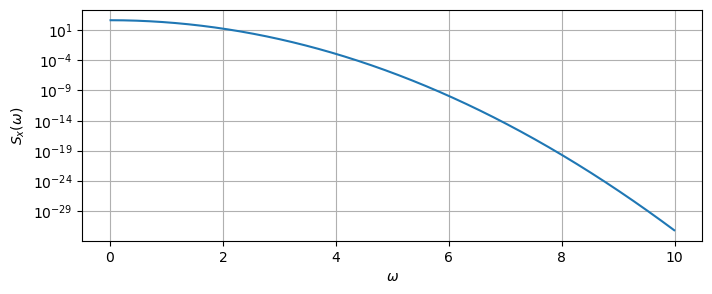

In [6]:
import numpy as np
from matplotlib import pyplot as plt

omega = np.arange(0.01,10,0.01) # Frequency axis
Sx=1e3/np.exp(4/5*omega**2+1) # Load spectrum

plt.figure(figsize=(8,3))
plt.plot(omega,Sx)
plt.grid()
plt.ylabel(r'$S_x(\omega)$')
plt.xlabel(r'$\omega$')
plt.yscale('log')



This load has the most energy content in the lower part of the frequency range. It appears to go to zero at $\omega=3$, but in fact there is still some energy content for higher frequencies. It can often be reasonable to plot spectra on a log-axis.

## Frequency response function

The frequency response function of the system is $H(\omega)=\dfrac{1}{-\omega^2 m+i \omega c+k}$.

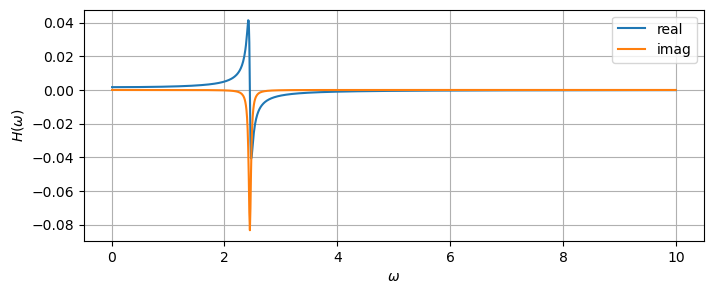

In [2]:
# Structural parameters
m=100
k=600
c=2*0.01*np.sqrt(k*m)

# FRF
H=1/(-omega**2*m+1j*omega*c+k)

plt.figure(figsize=(8,3))
plt.plot(omega,np.real(H),'-',label='real')
plt.plot(omega,np.imag(H),'-',label='imag')
plt.grid()
plt.ylabel(r'$H(\omega)$')
plt.xlabel(r'$\omega$')
plt.legend()



The FRF is complex, but it will in general peak at the natural frequency. Instead of plotting the real and imaginary part, it is possible to plot the absolute value and phase angle.

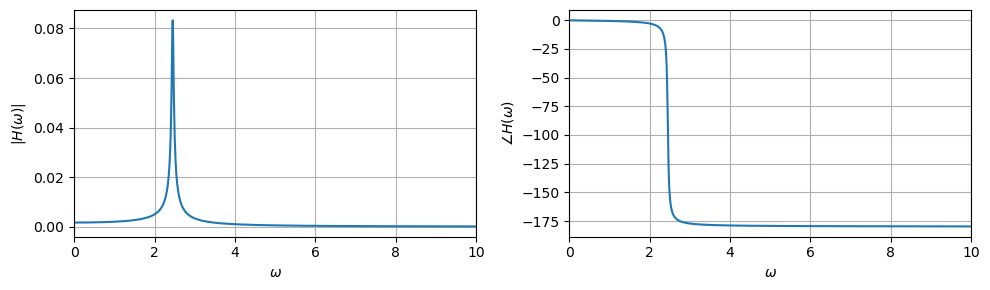

In [3]:
plt.figure(figsize=(10, 3))

# Plot absolute value
plt.subplot(1, 2, 1)
plt.plot(omega,np.abs(H),'-')
plt.xlim(0,10)
plt.xlabel(r'$\omega$')
plt.ylabel(r'$|H(\omega)|$')
plt.grid(True)

# Plot phase angle
plt.subplot(1, 2, 2)
plt.plot(omega,np.angle(H)*180/np.pi,'-')
plt.xlim(0,10)
plt.xlabel(r'$\omega$')
plt.ylabel(r'$\angle H(\omega)$')
plt.grid(True)

plt.tight_layout()


## Response spectrum

The spectral density of the response will be $S_y(\omega)=|H(\omega)|^2 S_x(\omega)$.


Text(0.5, 0, '$\\omega$')

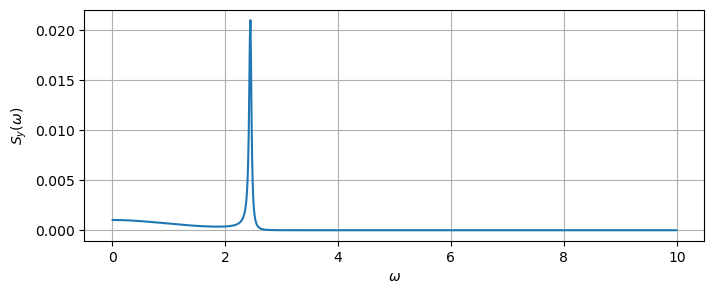

In [4]:
Sy=np.abs(H)**2*Sx

plt.figure(figsize=(8,3))
plt.plot(omega,Sy)
plt.grid()
plt.ylabel(r'$S_y(\omega)$')
plt.xlabel(r'$\omega$')
#plt.yscale('log')

We observe that the displacement response will be concentrated around the natural frequency. There is also a contribution at lower frequencies, since the load's energy is concentrated in that region.

In conclusion, the response will always be a combination of the load's frequency characteristics and the magnification through the structural behavior (i.e., resonance).

## Response distribution

The response will be a random process with a Gaussian probability distribution since the load was Gaussian. We can find its standard deviation by the area under the spectrum:

$$\sigma_y^2=\int_0^{\infty} S_y(\omega) \: \text{d} \omega$$


In [5]:
sd_y=np.trapz(Sy,omega)**0.5

print('sigma_y is ' + '{:0.4f}'.format(sd_y) + ' m')

sigma_y is 0.0547 m


The information about the statistical moments of the response will be useful when we later consider extreme values, which are important for design.